### CNN을 사용한 IMDB
--------------------
IMDB 데이터셋 : 케라스에 포함되어있는 데이터셋으로 인터넷 영화의 데이터베이스로부터 가져온 양극단의 리뷰 5만개로 이루어진 데이터셋

IMDB 데이터 특징

    1) 전처리되어 있어 각 리뷰가 숫자 시퀀스로 변환되어 있음
    2) 각 숫자는 사전에 있는 고유한 단어를 나타냄
    3) 훈련 데이터 2만 5천개와 테스트 데이터 2만 5천개로 나뉨
    4) 각각 50%는 긍정, 50%는 부정으로 구성
    
--------------------
CNN (합성곱 신경망) : 입력층, 출력층 가운데 중간층에 합성곱층과 풀링층을 둔 신경망으로 다차원 배열을 통해 데이터를 처리

CNN 모델 특징 : 이미지를 읽어오게 되면 해상도가 높거나 하는 경우가 있는데 해상도를 낮춰주거나 샘플링을 반복

    1) 비선형 모델에서의 구현이 가능
    2) 합성곱 계층은 형상을 유지할수 있으며 3차원 그대로 사용 가능
    3) 사진, 음성인식과 같은 분야에 좋음
    
CNN의 종류

    1) 특징을 추출하는 신경망
    2) 분류를 하는 신경망

CNN 프로세스

> 입력데이터 > 입력층 > 합성곱층 > 합성곱층 > 풀링층 > 전결합층 > 전결합층 > 출력층 > 출력데이터

In [26]:
# IMDB과 CNN을 포함한 사용할 패키지들을 불러옴
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import Flatten, Dropout
from keras.layers import Conv1D, GlobalMaxPooling1D

maxfeatures = 15000
maxword = 150

# 훈련, 시험셋을 불러옴
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=maxfeatures)

In [27]:
#훈련셋과 시험셋을 구분하고 15000개씩 끊음
x_val = x_train[15000:]
y_val = y_train[15000:]
x_train = x_train[:15000]
y_train = y_train[:15000]

In [28]:
# 데이터셋 전처리로 문장의 길이를 앞에서 150(maxword) 설정대로 맞춤
x_train = sequence.pad_sequences(x_train, maxlen=maxword)
x_val = sequence.pad_sequences(x_val, maxlen=maxword)
x_test = sequence.pad_sequences(x_test, maxlen=maxword)

In [29]:
# CNN 모델을 구현
model = Sequential()
model.add(Embedding(max_features, 128, input_length=text_max_words))
model.add(Dropout(0.2))
model.add(Conv1D(256,
                 3,
                 padding='valid',
                 activation='relu',
                 strides=1)) #컨볼루션 모델을 사용했고
model.add(GlobalMaxPooling1D()) # 컨볼루션 레이어가 문장을 찾아가며 특징벡터 중 가장 큰 벡터를 찾아줌
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.summary() #summary출력

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 150, 128)          1920000   
_________________________________________________________________
dropout_7 (Dropout)          (None, 150, 128)          0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 148, 256)          98560     
_________________________________________________________________
global_max_pooling1d_4 (Glob (None, 256)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_8 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 129       
Total para

In [30]:
# 모델을 학습하기 위해 과정을 정하고
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 64짜리 batch 사이즈와 25에포크로 모델 학습을 시작
hist = model.fit(x_train, y_train, epochs=25, batch_size=64, validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/25
15000/15000 [==============================] - 79s 5ms/step - loss: 0.5136 - acc: 0.7219 - val_loss: 0.3282 - val_acc: 0.8592
Epoch 2/25
15000/15000 [==============================] - 76s 5ms/step - loss: 0.2553 - acc: 0.8935 - val_loss: 0.2904 - val_acc: 0.8774
Epoch 3/25
15000/15000 [==============================] - 76s 5ms/step - loss: 0.1116 - acc: 0.9606 - val_loss: 0.3351 - val_acc: 0.8702
Epoch 4/25
15000/15000 [==============================] - 77s 5ms/step - loss: 0.0280 - acc: 0.9945 - val_loss: 0.3882 - val_acc: 0.8750
Epoch 5/25
15000/15000 [==============================] - 77s 5ms/step - loss: 0.0073 - acc: 0.9993 - val_loss: 0.4625 - val_acc: 0.8713
Epoch 6/25
15000/15000 [==============================] - 76s 5ms/step - loss: 0.0025 - acc: 0.9999 - val_loss: 0.4792 - val_acc: 0.8737
Epoch 7/25
15000/15000 [==============================] - 77s 5ms/step - loss: 0.0012 - acc: 1.0000 - val_loss: 0.5150 - val_acc

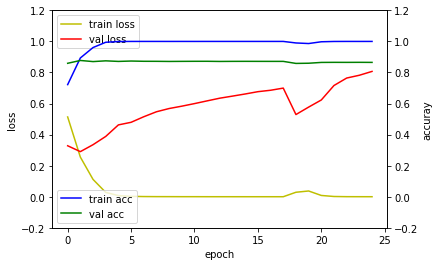

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt #plt임포트

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([-0.2, 1.2])

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylim([-0.2, 1.2])

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')
plt.show()

In [32]:
# 모델 평가

loss_and_metrics = model.evaluate(x_test, y_test, batch_size=64)
print('- 평가결과는!? -')
print(loss_and_metrics)

25000/25000 [==============================] - 37s 1ms/step
- 평가결과는!? -
[0.8304133622550964, 0.85696]
